# Normalized Energy Output

### Definition 

**Normalized Energy Output (NEO)** is a metric used to measure the energy production of an inverter relative to its rated capacity. It is calculated by dividing the actual energy produced by the inverter (measured in kWh) by the inverter's rated capacity (measured in kW). This provides a dimensionless value that allows for easy comparison between different inverters regardless of their size.

Formula:

NEO(kwh/kw) = PV_Production/Rated Capacity 

Where:
- **PV Production**: Energy produced by the inverter (in kWh).
- **Rated Capacity**: Maximum energy the inverter can produce (in kW).



### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Data

In [2]:
# Load each inverter's data into separate DataFrames
inv1 = pd.read_excel("inv1.xlsx")
inv2 = pd.read_excel("Inv2.xlsx")
inv3 = pd.read_excel("inv3.xlsx")
inv4 = pd.read_excel("inv4.xlsx")

### 3. EDA

In [3]:
inv1.head(3)

,date,inverter,pv_production,rated_capacity
0,2025-12-01,Inv1_215p,1.692851,215
1,2025-12-02,Inv1_215p,0.747736,215
2,2025-12-03,Inv1_215p,0.031793,215


In [4]:
inverters= [inv1, inv2, inv3, inv4]

### 4. Function for Normalized Energy Output

In [5]:
def normalized_energy_output(inverters):
    for df in inverters:
        df['normalized_energy_output'] = df['pv_production'] / df['rated_capacity'] 
    return inverters

In [6]:
#function call
noe= normalized_energy_output(inverters)

In [7]:
inv1.head(3)

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv1_215p,1.692851,215,0.007874
1,2025-12-02,Inv1_215p,0.747736,215,0.003478
2,2025-12-03,Inv1_215p,0.031793,215,0.000148


In [8]:
inv2.head(2)

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv2_105p,1.058967,105,0.010085
1,2025-12-02,Inv2_105p,0.444032,105,0.004229


### 5. Combine Data into a Single DataFrame - for Plotting

In [9]:
# Combine all inverters' data into a single DataFrame
combined_df = pd.concat(inverters)
combined_df

,date,inverter,pv_production,rated_capacity,normalized_energy_output
0,2025-12-01,Inv1_215p,1.692851,215,0.007874
1,2025-12-02,Inv1_215p,0.747736,215,0.003478
2,2025-12-03,Inv1_215p,0.031793,215,0.000148
3,2025-12-04,Inv1_215p,0.888522,215,0.004133
4,2025-12-05,Inv1_215p,1.098029,215,0.005107
...,...,...,...,...,...
20,2025-12-25,Inv4_105p,0.199435,105,0.001899
21,2025-12-26,Inv4_105p,0.188890,105,0.001799
22,2025-12-27,Inv4_105p,0.077744,105,0.000740
23,2025-12-28,Inv4_105p,0.210910,105,0.002009


### 7. Create Date Range for the Entire Month

In [10]:
# Ensure the 'date' column is in datetime format for proper plotting
combined_df['date'] = pd.to_datetime(combined_df['date'])

#ensure that all the dates in the range are available for plotting
date_range = pd.date_range(start=combined_df['date'].min(), end=combined_df['date'].max(), freq='D')

### 8. Plot

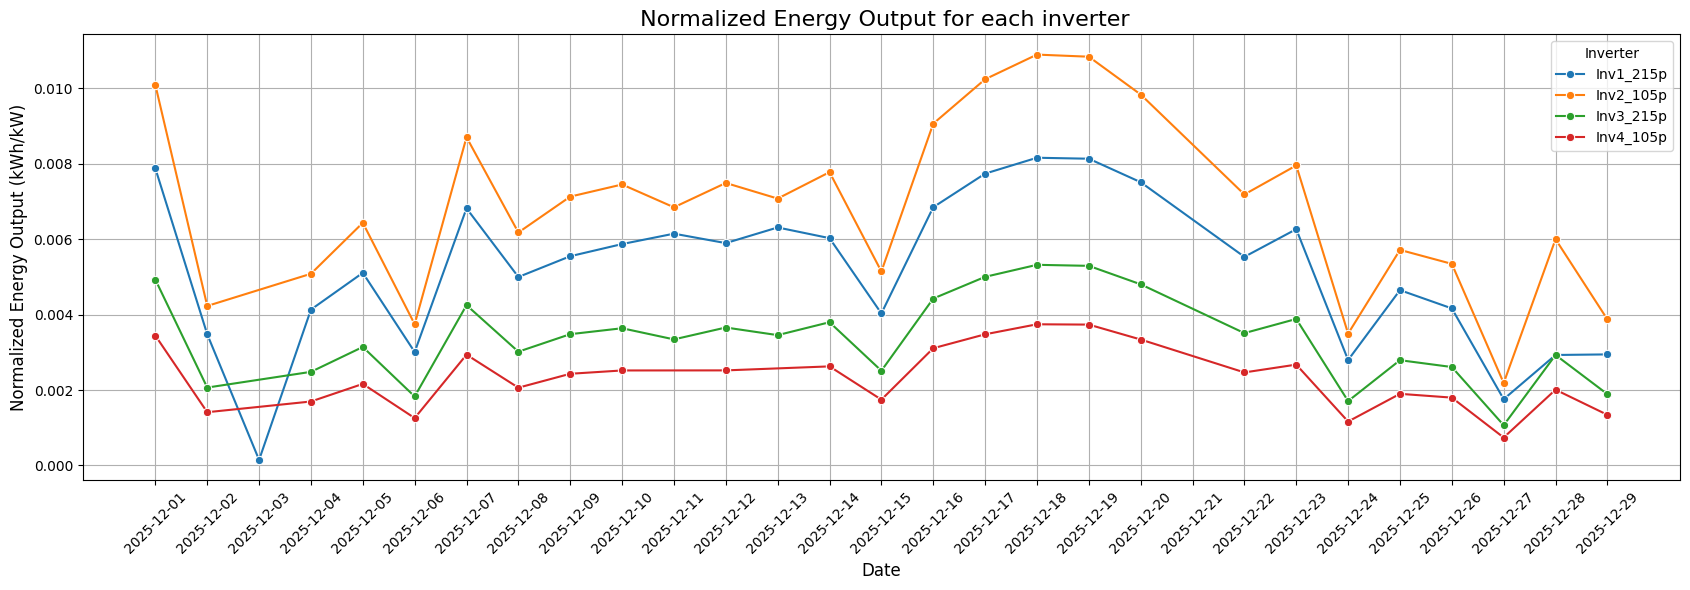

In [11]:

# Plotting Normalized Energy Output for each inverter (daily)
plt.figure(figsize=(17, 6))
sns.lineplot(data=combined_df, x='date', y='normalized_energy_output', hue='inverter', marker='o', palette='tab10')


plt.title(" Normalized Energy Output for each inverter", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Energy Output (kWh/kW)", fontsize=12)
plt.legend(title="Inverter", fontsize=10)
plt.xticks(date_range, rotation=45)  # Makes all dates are visible
plt.grid(True)
plt.tight_layout()
plt.show()
